In [1]:
import uproot
import numpy as np
import pandas as pd
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

#import mplhep as hep
#hep.style.use("ATLAS")

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

import joblib

import hist

import seaborn as sns

In [2]:
datadir = "/home/chardong/y_identification/Venv/save_pkl/"
savedir = "/home/chardong/y_identification/Venv/save_plots/Py8_yj_jj_train_skim30/"
savedirmodel = "/home/chardong/y_identification/Venv/BDT_model/"

In [3]:
totald = pd.read_pickle(datadir+"RAW_data/Py8_yj_jj_mc16ade_pd122_train_w_skim_05.pkl")

In [4]:
# Loading BDT model 
model_skim30 = joblib.load(savedirmodel+"skim30/LGBMClassifier_model_hard_no_loose_lr0.05_35_skim30.pkl")

In [5]:
model_skim30

LGBMClassifier(force_col_wise=True, learning_rate=0.05, max_depth=-5,
               n_estimators=1000, num_leaves=35, objective='xentropy')

In [6]:
# Loading BDT model running with mu
model_skim30_Addevtmu = joblib.load(savedirmodel+"skim30/LGBMClassifier_model_hard_no_loose_lr0.05_35_skim30_Addevtmu.pkl")

In [7]:
model_skim30_Addevtmu

LGBMClassifier(force_col_wise=True, learning_rate=0.05, max_depth=-5,
               n_estimators=1000, num_leaves=35, objective='xentropy')

In [8]:
df_test = pd.read_pickle(datadir+"df_test_sample_hard_scattering/df_test_sample_hard_scattering_skim30.pkl")
df_test

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score
0,51.956734,2.267797,-1.499033,49.392670,3,48.548934,0.0,31.50,False,False,12.533671,2.266477,0.998945,0.001055
1,34.364429,-1.958636,1.959331,317.343506,1,38.855491,0.0,47.50,False,False,26.214190,-1.961529,0.894247,0.105753
2,39.007401,0.172711,-0.628337,9999.000000,0,554.386153,1.0,29.50,True,True,37.140778,0.202515,0.026289,0.973711
3,86.679977,0.162386,2.113541,9999.000000,0,40.708948,1.0,22.50,True,True,86.595421,0.162440,0.029999,0.970001
4,281.008636,-0.796674,0.281347,9999.000000,0,0.283104,1.0,28.50,True,True,282.742554,-0.796599,0.020765,0.979235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494372,43.406239,1.724553,-0.356645,88.554863,5,34.390531,0.0,43.50,False,False,22.481043,1.724617,0.993703,0.006297
3494373,550.298889,-0.506703,1.353711,9999.000000,0,0.013548,1.0,15.50,True,True,546.056641,-0.506655,0.019175,0.980825
3494374,174.141190,0.462812,2.917594,9999.000000,0,2.829482,1.0,31.50,True,True,176.855133,0.462957,0.020449,0.979551
3494375,280.226105,1.251904,-2.007665,673.256714,2,0.306223,1.0,28.49,True,True,284.577698,1.252312,0.061607,0.938393


In [9]:
#df_test.to_pickle(datadir+"df_test_sample_hard_scattering/df_test_sample_hard_scattering_skim30.pkl")

In [10]:
df_test_Addevtmu = pd.read_pickle(datadir+"df_test_sample_hard_scattering/df_test_Addevtmu_sample_hard_scattering_skim30.pkl")
df_test_Addevtmu

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Addevtmu_background_score,Addevtmu_signal_score
0,51.956734,2.267797,-1.499033,49.392670,3,48.548934,0.0,31.50,False,False,12.533671,2.266477,0.998116,0.001884
1,34.364429,-1.958636,1.959331,317.343506,1,38.855491,0.0,47.50,False,False,26.214190,-1.961529,0.886565,0.113435
2,39.007401,0.172711,-0.628337,9999.000000,0,554.386153,1.0,29.50,True,True,37.140778,0.202515,0.031017,0.968983
3,86.679977,0.162386,2.113541,9999.000000,0,40.708948,1.0,22.50,True,True,86.595421,0.162440,0.030308,0.969692
4,281.008636,-0.796674,0.281347,9999.000000,0,0.283104,1.0,28.50,True,True,282.742554,-0.796599,0.022537,0.977463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494372,43.406239,1.724553,-0.356645,88.554863,5,34.390531,0.0,43.50,False,False,22.481043,1.724617,0.991417,0.008583
3494373,550.298889,-0.506703,1.353711,9999.000000,0,0.013548,1.0,15.50,True,True,546.056641,-0.506655,0.018173,0.981827
3494374,174.141190,0.462812,2.917594,9999.000000,0,2.829482,1.0,31.50,True,True,176.855133,0.462957,0.023897,0.976103
3494375,280.226105,1.251904,-2.007665,673.256714,2,0.306223,1.0,28.49,True,True,284.577698,1.252312,0.054514,0.945486


#### Save the dataframe

In [11]:
df_test_combined = pd.read_pickle(datadir+"df_test_sample_hard_scattering/df_test_combined_sample_hard_scattering_skim30.pkl")
df_test_combined

,y_pt,y_eta,y_phi,y_convRadius,y_convType,weight,truth_label,evt_mu,y_IsLoose,y_IsTight,y_truth_pt,y_truth_eta,Original_background_score,Original_signal_score,Addevtmu_background_score,Addevtmu_signal_score
0,51.956734,2.267797,-1.499033,49.392670,3,48.548934,0.0,31.50,False,False,12.533671,2.266477,0.998945,0.001055,0.998116,0.001884
1,34.364429,-1.958636,1.959331,317.343506,1,38.855491,0.0,47.50,False,False,26.214190,-1.961529,0.894247,0.105753,0.886565,0.113435
2,39.007401,0.172711,-0.628337,9999.000000,0,554.386153,1.0,29.50,True,True,37.140778,0.202515,0.026289,0.973711,0.031017,0.968983
3,86.679977,0.162386,2.113541,9999.000000,0,40.708948,1.0,22.50,True,True,86.595421,0.162440,0.029999,0.970001,0.030308,0.969692
4,281.008636,-0.796674,0.281347,9999.000000,0,0.283104,1.0,28.50,True,True,282.742554,-0.796599,0.020765,0.979235,0.022537,0.977463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494372,43.406239,1.724553,-0.356645,88.554863,5,34.390531,0.0,43.50,False,False,22.481043,1.724617,0.993703,0.006297,0.991417,0.008583
3494373,550.298889,-0.506703,1.353711,9999.000000,0,0.013548,1.0,15.50,True,True,546.056641,-0.506655,0.019175,0.980825,0.018173,0.981827
3494374,174.141190,0.462812,2.917594,9999.000000,0,2.829482,1.0,31.50,True,True,176.855133,0.462957,0.020449,0.979551,0.023897,0.976103
3494375,280.226105,1.251904,-2.007665,673.256714,2,0.306223,1.0,28.49,True,True,284.577698,1.252312,0.061607,0.938393,0.054514,0.945486


In [12]:
shower_shape_var = ['y_Reta',
                    'y_Rphi',
                    'y_weta2',
                    'y_fracs1',
                    'y_weta1',
                    'y_wtots1',
                    'y_Rhad',
                    'y_Rhad1',
                    'y_Eratio', 
                    'y_deltae']

prcpl_vx = ['evt_mu']       #Principal vertex parametrs, feel free to rocket me if I'm wrong


conv_var = [ 'y_convRadius', 'y_convType']

kinem_var = ['y_pt', 'y_eta', 'y_phi']

#truth_var = ['y_truth_pt', 'y_truth_eta', 'y_truth_pdgId', 'y_truth_mother_pdgId' ]
truth_var = ['y_truth_pt', 'y_truth_eta' ]

discriminating_var = shower_shape_var + kinem_var + conv_var + prcpl_vx

In [13]:
set(totald.columns)-set(discriminating_var)

{'truth_label',
 'weight',
 'y_IsLoose',
 'y_IsTight',
 'y_jmin_dr',
 'y_noFF_Eratio',
 'y_noFF_Reta',
 'y_noFF_Rhad',
 'y_noFF_Rhad1',
 'y_noFF_Rphi',
 'y_noFF_deltae',
 'y_noFF_fracs1',
 'y_noFF_weta1',
 'y_noFF_weta2',
 'y_noFF_wtots1',
 'y_truth_eta',
 'y_truth_pt'}

In [14]:
Y_var = ["truth_label",
         "weight",
         'y_IsTight',
         'y_IsLoose',
         'evt_mu', 
        ]

Y_var

['truth_label', 'weight', 'y_IsTight', 'y_IsLoose', 'evt_mu']

In [15]:
X = totald[discriminating_var+truth_var]
Y = totald[Y_var]

In [16]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [18]:
weight_train = y_train["weight"]
weight_val   = y_val  ["weight"]
weight_test  = y_test ["weight"]

In [19]:
othervars_train = y_train[['evt_mu', 'y_IsLoose', 'y_IsTight']]
othervars_val   = y_val  [['evt_mu', 'y_IsLoose', 'y_IsTight']]
othervars_test  = y_test [['evt_mu', 'y_IsLoose', 'y_IsTight']]

In [20]:
truth_train = x_train[['y_truth_pt','y_truth_eta']]
truth_val   = x_val  [['y_truth_pt','y_truth_eta']]
truth_test  = x_test [['y_truth_pt','y_truth_eta']]

In [21]:
truth_var_drop = list(set(y_train.columns)-{'truth_label'})
truth_var_drop

['weight', 'evt_mu', 'y_IsTight', 'y_IsLoose']

In [22]:
y_train = y_train.drop(truth_var_drop, axis=1)
y_test  = y_test.drop(truth_var_drop, axis=1)
y_val   = y_val.drop(truth_var_drop, axis=1)

In [23]:
x_train = x_train.drop(truth_var, axis=1)
x_test  = x_test.drop(truth_var, axis=1)
x_val   = x_val.drop(truth_var, axis=1)

In [24]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)

In [29]:
s_tot = sum( df_test_Addevtmu[(df_test_Addevtmu["truth_label"] == 1)]["weight"] )
s_selected = sum( df_test_Addevtmu[(df_test_Addevtmu["truth_label"] == 1) & (df_test_Addevtmu['y_IsTight'].values)]["weight"] )
s_eff = s_selected / s_tot

b_tot = sum( df_test_Addevtmu[(df_test_Addevtmu["truth_label"] == 0)]["weight"] )
b_selected = sum( df_test_Addevtmu[(df_test_Addevtmu["truth_label"] == 0) & (df_test_Addevtmu['y_IsTight'].values)]["weight"] )
b_eff = b_selected / b_tot

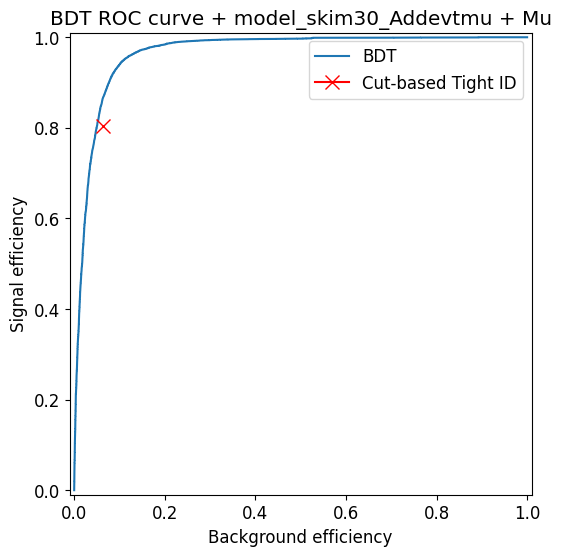

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

mod_disp = RocCurveDisplay.from_estimator(model_skim30_Addevtmu, x_test, y_test, sample_weight=weight_test, 
                                          label="BDT", ax=ax) 

plt.plot(b_eff, s_eff, marker="x", markersize=10, color="red", label = 'Cut-based Tight ID')

plt.xlabel('Background efficiency')
plt.ylabel('Signal efficiency')

#plt.xlim([0.0, 0.15])
#plt.ylim([0.65, 1.0])
#plt.title('BDT ROC curve - zoom')

plt.title('BDT ROC curve + model_skim30_Addevtmu + Mu')
plt.legend()

#plt.savefig(savedir+'AddEvtmu_ROC_lr_0.05_35_weight_skim30.pdf')
plt.show()

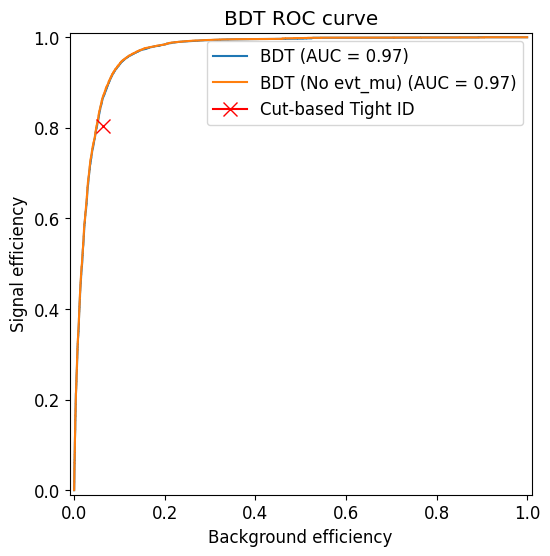

In [31]:
# data without "evt_mu" feature
x_test_without_evt_mu = x_test.drop(columns=["evt_mu"])

fig, ax = plt.subplots(figsize=(8, 6))

# ROC curve for model_skim30_Addevtmu
RocCurveDisplay.from_estimator(
    model_skim30_Addevtmu, x_test, y_test, sample_weight=weight_test, 
    name="BDT", ax=ax
)

# ROC curve for model_skim30
RocCurveDisplay.from_estimator(
    model_skim30, x_test_without_evt_mu, y_test, sample_weight=weight_test, 
    name="BDT (No evt_mu)", ax=ax
)

# Plot  cut-based tight ID
plt.plot(b_eff, s_eff, marker="x", markersize=10, color="red", label='Cut-based Tight ID')

plt.xlabel('Background efficiency')
plt.ylabel('Signal efficiency')
plt.title('BDT ROC curve')
plt.legend()
#plt.savefig(savedir+'ROC_lr_0.05_35_weight_skim30_mu+Nmu.pdf')

plt.show()


KeyError: 'background_score'

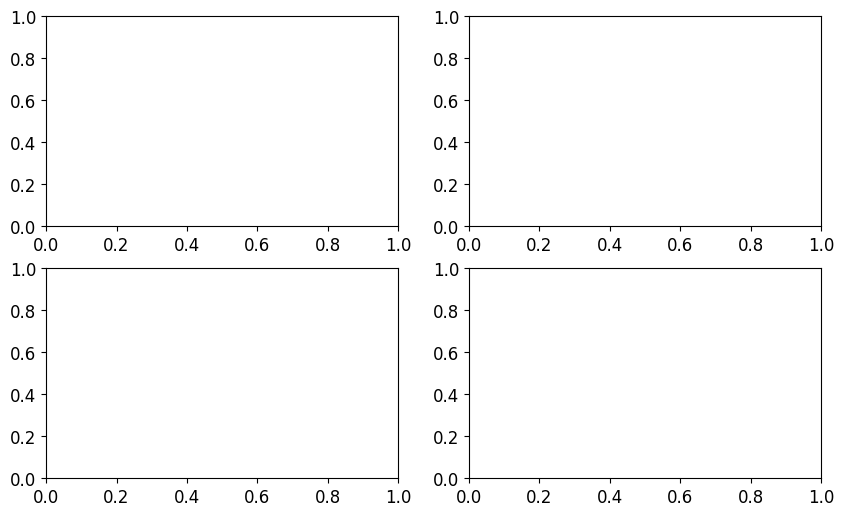

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
bins = 30

ax[0, 0].hist(df_test_Addevtmu[(df_test_Addevtmu['truth_label']==0)]['background_score'], log = True, density = True,
              bins=bins, color='blue', alpha=0.5, label='Bkg_Addmu Score', histtype='step')
ax[0, 0].hist(df_test_Addevtmu[(df_test_Addevtmu['truth_label']==1)]['background_score'], log = True, density = True,
              bins=bins, color='red', alpha=0.5, label='Sig_Addmu Score', histtype='step')

ax[0, 0].set_title("FROM Background Scores Addevtmu")
ax[0, 0].legend()


ax[0, 1].hist(df_test_Addevtmu[(df_test_Addevtmu['truth_label']==0)]['signal_score'], log = True, density = True, 
              bins=bins, color='blue', alpha=0.5, label='Bkg_Addmu Score', histtype='step')
ax[0, 1].hist(df_test_Addevtmu[(df_test_Addevtmu['truth_label']==1)]['signal_score'], log = True, density = True, 
             bins=bins, color='red', alpha=0.5, label='Sig_Addmu Score', histtype='step')
ax[0, 1].set_title("FROM Signal  Scores Addevtmu")
ax[0, 1].legend()


ax[1, 0].hist(df_test[(df_test['truth_label']==0)]['background_score'], log = True, density = True,
             bins=bins, color='blue', alpha=0.5, label='Bkg Score', histtype='step')
ax[1, 0].hist(df_test[(df_test['truth_label']==1)]['background_score'], log = True, density = True,
             bins=bins, color='red', alpha=0.5, label='Sig Score', histtype='step')
ax[1, 0].set_title("FROM Background Scores")
ax[1, 0].legend()


ax[1, 1].hist(df_test[(df_test['truth_label']==0)]['signal_score'], log = True, density = True, 
             bins=bins, color='blue', alpha=0.5, label='Bkg Score', histtype='step')
ax[1, 1].hist(df_test[(df_test['truth_label']==1)]['signal_score'], log = True, density = True,
             bins=bins, color='red', alpha=0.5, label='Sig Score', histtype='step')
ax[1, 1].set_title("FROM Signal Scores")
ax[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # Corrected subplot grid size to 2x1

# background Scores
ax[0].hist(df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 0]['signal_score'], 
           bins=50, color='blue', alpha=0.5, log=True, density=True, 
           weights=df_test_Addevtmu[df_test_Addevtmu["truth_label"]==0]["weight"], label='Background Score (Addmu)', histtype='step')
ax[0].hist(df_test[df_test['truth_label'] == 0]['signal_score'], 
           bins=50, color='red', alpha=0.5, log=True, density=True, 
           weights=df_test[df_test["truth_label"]==0]["weight"], label='Background Score (No Mu)', histtype='step')
ax[0].set_title("Background Scores")
ax[0].legend()

# Signal Scores
ax[1].hist(df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 1]['signal_score'], 
           bins=50, color='blue', alpha=0.5, log=True, density=True, 
           weights=df_test_Addevtmu[df_test_Addevtmu["truth_label"]==1]["weight"], label='Signal Score (Addmu)', histtype='step')
ax[1].hist(df_test[df_test['truth_label'] == 1]['signal_score'], 
           bins=50, color='red', alpha=0.5, log=True, density=True, 
           weights=df_test[df_test["truth_label"]==1]["weight"], label='Signal Score (No Mu)', histtype='step')
ax[1].set_title("Signal Scores")
ax[1].legend()

plt.tight_layout()
plt.show()


# Calcul Direct de Différences

In [ ]:
# Définir les bords des histogrammes
edges = np.linspace(0, 1, 51)
axis_diff_score = hist.axis.Variable(edges, name="diff_score", label="Différence des Scores")

# Fill hist pour le fond et le signal
hist_bkg_with_mu = hist.Hist(axis_diff_score).fill(
    df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 0]['signal_score']
)
hist_bkg_without_mu = hist.Hist(axis_diff_score).fill(
    df_test[df_test['truth_label'] == 0]['signal_score']
)

hist_sig_with_mu = hist.Hist(axis_diff_score).fill(
    df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 1]['signal_score']
)
hist_sig_without_mu = hist.Hist(axis_diff_score).fill(
    df_test[df_test['truth_label'] == 1]['signal_score']
)

# Calcule différence des histogrammes
diff_bkg = hist_bkg_with_mu - hist_bkg_without_mu
diff_sig = hist_sig_with_mu - hist_sig_without_mu

# Tracé
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Courbe différence bkg
ax[0].step(edges[:-1], diff_bkg.values(), where='mid', label='Différence Bkg (Avec Mu - Sans Mu)', color='blue')
ax[0].set_title('Différence Bkg score')
ax[0].set_xlabel('Scores')
ax[0].set_ylabel('Différence')
ax[0].legend()

# Courbe différence sig
ax[1].step(edges[:-1], diff_sig.values(), where='mid', label='Différence Signal (Avec Mu - Sans Mu)', color='red')
ax[1].set_title('Différence sig score')
ax[1].set_xlabel('Scores')
ax[1].set_ylabel('Différence')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
bins = 50
bin_edges = np.linspace(0, 1, bins+1)

# Background mu
data_mu_bkg = df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 0]['signal_score']
weights_mu_bkg = df_test_Addevtmu[df_test_Addevtmu["truth_label"]==0]["weight"]
# Background No mu
data_no_mu_bkg = df_test[df_test['truth_label'] == 0]['signal_score']
weights_no_mu_bkg = df_test[df_test["truth_label"]==0]["weight"]

# Signal mu
data_mu_sig = df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 1]['signal_score']
weights_mu_sig = df_test_Addevtmu[df_test_Addevtmu["truth_label"]==1]["weight"]
# Signal No mu
data_no_mu_sig = df_test[df_test['truth_label'] == 1]['signal_score']
weights_no_mu_sig = df_test[df_test["truth_label"]==1]["weight"]


# Fonction calcule hist
def calculate_histograms(data, weights, bins):
    counts, _ = np.histogram(data, bins=bins, density=True, weights=weights)
    return counts

# Calcul
counts_mu_bkg = calculate_histograms(data_mu_bkg, weights_mu_bkg, bin_edges) 
counts_no_mu_bkg = calculate_histograms(data_no_mu_bkg, weights_no_mu_bkg, bin_edges)
counts_mu_sig = calculate_histograms(data_mu_sig, weights_mu_sig, bin_edges)
counts_no_mu_sig = calculate_histograms(data_no_mu_sig, weights_no_mu_sig, bin_edges)

# Diff signal
diff_sig = counts_mu_sig - counts_no_mu_sig
# Diff background
diff_bkg = counts_mu_bkg - counts_no_mu_bkg

# hist Background
axs[0].step(bin_edges[:-1], counts_mu_bkg, where='mid', color='blue', label='Background Score (Addmu)', alpha=0.5)
axs[0].step(bin_edges[:-1], counts_no_mu_bkg, where='mid', color='red', label='Background Score (No Mu)', alpha=0.5)
# et différences
rax = axs[0].twinx() 
rax.step(bin_edges[:-1], diff_bkg, where='mid', color='green', label='Diff Bkg (Mu - No Mu)', alpha=0.5)
rax.set_ylabel('Difference')
rax.legend(loc='upper left')

# hist Signal
axs[1].step(bin_edges[:-1], counts_mu_sig, where='mid', color='blue', label='Signal Score (Addmu)', alpha=0.5)
axs[1].step(bin_edges[:-1], counts_no_mu_sig, where='mid', color='red', label='Signal Score (No Mu)', alpha=0.5)
# et différences
rax2 = axs[1].twinx()  
rax2.step(bin_edges[:-1], diff_sig, where='mid', color='orange', label='Diff Signal (Mu - No Mu)', alpha=0.5)
rax2.set_ylabel('Difference')
rax2.legend(loc='upper right')

for ax in axs:
    ax.set_xlabel("$evt_{\mu}$")
    ax.set_ylabel("Density")
    ax.set_yscale('log') 
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
df_diff = df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 0]['signal_score'] - df_test[df_test['truth_label'] == 0]['signal_score']

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_diff, histtype='step', edgecolor='green', bins=50, facecolor='blue', alpha=0.5, 
      #  weights=df_test[df_test["truth_label"]==0]["weight"],
        density=True, label='Différence Score(Bkg_Addmu - Bkg_NoMu)')
ax.set_title("Diff Background score")
ax.set_xlabel("Différence")
ax.set_ylabel("Fréquence")
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
df_diff = df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 1]['signal_score'] - df_test[df_test['truth_label'] == 1]['signal_score']

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_diff, histtype='step', edgecolor='green', bins=50, facecolor='blue', alpha=0.5, 
      #  weights=df_test[df_test["truth_label"]==0]["weight"],
        density=True, label='Difference Score(sig_Addmu - sig_NoMu)')
ax.set_title("Diff Signal score")
ax.set_xlabel("Différence")
ax.set_ylabel("Fréquence")
ax.legend()

plt.tight_layout()
plt.show()


# Analyse plus nuancée des distributions sous-jacentes

In [ ]:
edges = np.linspace(-1, 1, 50)
axis_diff_score = hist.axis.Variable(edges, name="diff_score", label="Diff")

# Fill hist for background and signal score differences
diff_score_bkg = hist.Hist(axis_diff_score).fill(
    df_test_Addevtmu[(df_test_Addevtmu['truth_label'] == 0)]['signal_score'] -
    df_test[(df_test['truth_label'] == 0)]['signal_score']
)

diff_score_sig = hist.Hist(axis_diff_score).fill(
    df_test_Addevtmu[df_test_Addevtmu['truth_label'] == 1]['signal_score'] -
    df_test[(df_test['truth_label'] == 1)]['signal_score']
)

# Plotting using hist library's objects
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Using the bar method from hist.Hist object to plot
diff_score_bkg.plot(ax=ax[0], histtype='fill', edgecolor='blue', facecolor='blue', alpha=0.5, density=True, 
                    label='Background Score Difference')
ax[0].set_title("Background Score Differences")
ax[0].legend()

diff_score_sig.plot(ax=ax[1], histtype='fill', edgecolor='red', facecolor='red', alpha=0.5, density=True, 
                    label='Signal Score Difference')
ax[1].set_title("Signal Score Differences")
ax[1].legend()

plt.tight_layout()
plt.show()
